Домашняя работа
Нужно придумать небольшую базу данных и написать к ней запросы.

В базе должно быть минимум 4 таблицы и хотя бы две связи вида one-to-many или many-to-many. Можно решить как при помощи pandas, так и при помощи SQL.

Запросы должны быть осмысленными и должны решать какую-то задачу.

Easy
Выгрузить данные и отфильтровать их по какому-то значению.

Пример запроса с БД, приведенной выше: вывести учителей старше 30 лет.

Normal
Написать запрос на объединение двух или более таблиц, также в запросе должна быть фильтрация

Пример запроса с БД, приведенной выше: найти имя учителя моложе 30 лет, который ведет математику

Hard
Написать запрос, который посчитает какую-то сложную аналитику по БД, используя как можно больше таблиц. Построить графики и сделать выводы.

Пример запроса с БД, приведеной выше: задание 5.

In [16]:
import numpy as np
import pandas as pd
import sqlite3
sql = sqlite3.connect("example.sqlite3")

Создадим четыре таблице с двумя типами соединения : "один к одному" и "многие к многим"
Один к одному:

In [17]:
df1=pd.DataFrame({"visitor" :[ "Ann", "Bob","Alice","Alex"],"Order_dinner": ["Beef","Coffee","Chicken","Chicken"]})
df2=pd.DataFrame({"visitor" :[ "Ann", "Alice","Alex","Bob"],"visit_date":[ "05.09.2020","09.05.2020","12.08.2020","12.12.2020"]})


In [18]:
df1.to_sql('df1', sql, if_exists='replace',index_label='id')
df2.to_sql('df2', sql, if_exists='replace',index_label='id')

In [19]:
df5=pd.read_sql('SELECT * FROM df1 JOIN df2 USING(visitor);', sql)
df5 =  df5.loc[:,~df5.columns.duplicated()]
df5

,id,visitor,Order_dinner,visit_date
0,0,Ann,Beef,05.09.2020
1,1,Bob,Coffee,12.12.2020
2,2,Alice,Chicken,09.05.2020
3,3,Alex,Chicken,12.08.2020


Многие к одному:
    

In [21]:
df4=pd.DataFrame({"Order_dinner":["Beef","Coffee","Chicken"],"waiter":["Robot-Nick","Robot-Helly","Robot-Old-Jack"]})
df4.to_sql('df4', sql, if_exists='replace',index_label='id')


,visitor,Order_dinner
0,Ann,Beef
1,Bob,Coffee
2,Alice,Chicken
3,Alex,Chicken


In [22]:
quer ="""
SELECT
df1.visitor as visitors,
df1.Order_dinner as dinner,
visit_date,  
waiter as waiter
FROM df1
INNER JOIN df2  USING(visitor)
INNER JOIN df4  USING(Order_dinner)
"""

In [23]:
pd.read_sql(quer, sql)

,visitors,dinner,visit_date,waiter
0,Ann,Beef,05.09.2020,Robot-Nick
1,Bob,Coffee,12.12.2020,Robot-Helly
2,Alice,Chicken,09.05.2020,Robot-Old-Jack
3,Alex,Chicken,12.08.2020,Robot-Old-Jack


Многие ко многим

In [24]:
df5=pd.DataFrame({"visit_date":[ "05.09.2020","09.05.2020","12.08.2020","12.12.2020"],"weather_degree":[-2,5,-15,-20]})
df5.to_sql('df5', sql, if_exists='replace',index_label='id')

In [27]:
querty ="""
SELECT
df1.visitor as visitors,
df1.Order_dinner as dinner,
visit_date,
weather_degree as weather,
waiter as waiter
FROM df1
INNER JOIN df2  USING(visitor)
INNER JOIN df4  USING(Order_dinner)
INNER JOIN df5  USING(visit_date)
"""

In [28]:
pd.read_sql(querty, sql)

,visitors,dinner,visit_date,weather,waiter
0,Ann,Beef,05.09.2020,-2,Robot-Nick
1,Bob,Coffee,12.12.2020,-20,Robot-Helly
2,Alice,Chicken,09.05.2020,5,Robot-Old-Jack
3,Alex,Chicken,12.08.2020,-15,Robot-Old-Jack


Easy
Выгрузить данные и отфильтровать их по какому-то значению.

In [6]:
def filter_func(x):
    return x["weather_degree"]<0
df7.groupby("visitor").filter(filter_func)

,visitor,order,visit_date,weather_degree
0,Ann,Beef,05.09.2020,-2
1,Bob,Coffee,12.12.2020,-20
3,Alex,Chicken,12.08.2020,-15


In [30]:
querty1 ="""
SELECT
df1.visitor as visitors,
df1.Order_dinner as dinner,
visit_date,
weather_degree as weather,
waiter as waiter
FROM df1
INNER JOIN df2  USING(visitor)
INNER JOIN df4  USING(Order_dinner)
INNER JOIN df5  USING(visit_date)
WHERE weather_degree <0
"""

In [31]:
pd.read_sql(querty1, sql)

,visitors,dinner,visit_date,weather,waiter
0,Ann,Beef,05.09.2020,-2,Robot-Nick
1,Alex,Chicken,12.08.2020,-15,Robot-Old-Jack
2,Bob,Coffee,12.12.2020,-20,Robot-Helly


In [7]:
def filter_func2(x):
    return x["order"]=="Chicken"
df7.groupby("visitor").filter(filter_func2)

,visitor,order,visit_date,weather_degree
2,Alice,Chicken,09.05.2020,5
3,Alex,Chicken,12.08.2020,-15


In [47]:
querty2 ="""
SELECT
df1.visitor as visitors,
df1.Order_dinner as dinner,
visit_date,
weather_degree as weather,
waiter as waiter
FROM df1
INNER JOIN df2  USING(visitor)
INNER JOIN df4  USING(Order_dinner)
INNER JOIN df5  USING(visit_date)
WHERE dinner == 'Chicken' or dinner == 'Beef'
"""

In [48]:
pd.read_sql(querty2, sql)

,visitors,dinner,visit_date,weather,waiter
0,Ann,Beef,05.09.2020,-2,Robot-Nick
1,Alice,Chicken,09.05.2020,5,Robot-Old-Jack
2,Alex,Chicken,12.08.2020,-15,Robot-Old-Jack


Normal
Написать запрос на объединение двух или более таблиц, также в запросе должна быть фильтрация

In [8]:
df_total=pd.merge(df6[df6["waiter"] == "Robot-Old-Jack"],df7)
df_total

,visitor,order,visit_date,waiter,weather_degree
0,Alice,Chicken,09.05.2020,Robot-Old-Jack,5
1,Alex,Chicken,12.08.2020,Robot-Old-Jack,-15


In [51]:
querty3 ="""
SELECT
df1.visitor as visitors,
df1.Order_dinner as dinner,
visit_date,
weather_degree as weather,
waiter as waiter
FROM df1
INNER JOIN df2  USING(visitor)
INNER JOIN df4  USING(Order_dinner)
INNER JOIN df5  USING(visit_date)
WHERE dinner == 'Chicken' 
ORDER BY visit_date 
"""

In [52]:
pd.read_sql(querty3, sql)

,visitors,dinner,visit_date,weather,waiter
0,Alice,Chicken,09.05.2020,5,Robot-Old-Jack
1,Alex,Chicken,12.08.2020,-15,Robot-Old-Jack


Hard
Написать запрос, который посчитает какую-то сложную аналитику по БД, используя как можно больше таблиц. Построить графики и сделать выводы.

Загрузим данные по Штатам, доступные в Kaggle : первый датасет state: {Штат и его аббревиатура}, второй - Численность населения: {Аббревиатура региона, количество людей по двум  категориям (до 18 лет и  общая численность в штате),год и количество людей по каждому из двух групп в колонке возраст}, третий - Площадь: {Штат и площадь в кв.милях}.

In [53]:
state=pd.read_csv("state-abbrevs.csv")
population = pd.read_csv("state-population.csv")
areas = pd.read_csv("state-areas.csv")

In [54]:
state.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [84]:
population.columns = ['states', 'ages','year','population']
population.head()

,states,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [85]:
areas.columns = ['state', 'area']
areas.head()

,state,area
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


Преобразим наш датасет , уберем пропущенные переменные и добавим новые значения .

In [86]:
merged = pd.merge(population,state,how="outer",left_on = "states",right_on="abbreviation").drop("abbreviation",1)
merged[merged["population"].isnull()].head()
merged.loc[merged['states'] == "USA",'state'] = "United States"
merged.loc[merged['states'] == "PR",'state'] = "Puerto-Rico"
merged.isnull().any()


states        False
ages          False
year          False
population     True
state         False
dtype: bool

Соединим два датесета merged и areas и подсчитаем сколько квадратных миль приходится на одного человека по штатам по годам и нарисуем гистограму.

In [87]:
final = pd.merge(merged,areas,how="left",left_on = "state",right_on="state")
final2010=final.query("year==2010 & ages=='total' ")
final2010= final2010[final2010['area'].notna()]


In [88]:
final2010 = final2010.astype({"population": int, "area": int})

final2010["area_per_person"]=final2010["population"]/final2010["area"]



Проделаем то же самое с помощью SQL

In [103]:
areas.to_sql('areas', sql, if_exists='replace',index_label='id')
population.to_sql('population', sql, if_exists='replace',index_label='id')
state.to_sql('state', sql, if_exists='replace',index_label='id')

In [123]:
querty ="""
SELECT
pop.ages as ages,
pop.year as year,
pop.population as population,
st.state as state,
area
FROM population as pop
JOIN state as st ON st.abbreviation=pop.states
JOIN areas USING(state)
WHERE ages =='total' and area IS NOT NULL 
"""

In [124]:
pd.read_sql(querty, sql)

,ages,year,population,state,area
0,total,2012,4817528.0,Alabama,52423
1,total,2010,4785570.0,Alabama,52423
2,total,2011,4801627.0,Alabama,52423
3,total,2009,4757938.0,Alabama,52423
4,total,2013,4833722.0,Alabama,52423
...,...,...,...,...,...
1219,total,1994,480283.0,Wyoming,97818
1220,total,1992,466251.0,Wyoming,97818
1221,total,1993,473081.0,Wyoming,97818
1222,total,1991,459260.0,Wyoming,97818


In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

final2010.plot.bar(x='state', y='area_per_person')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


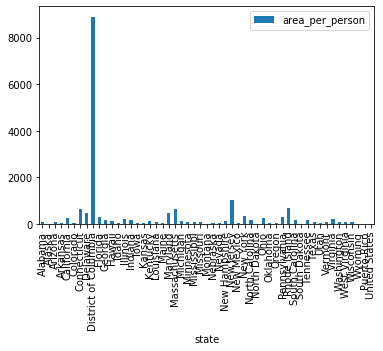

In [126]:
import plotly.express as px
final2012 =final.query("year==2010 & ages == 'total' ")
final2012["area_per_person"]=final2012["population"]/final2012["area"]

final2012.plot.bar(x='state', y='area_per_person')


Меньше всего свободного места в щтате Колумбия "Distinct of Columbia" - посмотрим подробнее:

In [129]:
final2010.set_index("states",inplace=True)
density = final2010["population"]/final2010["area"]
density.sort_values(ascending=False,inplace=True)
density.head()


states
DC    8898.897059
NJ    1009.253268
RI     681.339159
CT     645.600649
MA     621.815538
dtype: float64